<a href="https://colab.research.google.com/github/BeeMugo9/BeeMugo9/blob/main/ReCell_Mobile_Business_Analytics_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  ReCell Mobile Business Analytics using Python

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [28]:
sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [2]:
# upload files
from google.colab import files
uploaded = files.upload()

Saving used_device_data.csv to used_device_data.csv


In [3]:
df1=pd.read_csv('used_device_data.csv')
print(df1)

     brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no            13.0   
1         Honor  Android        17.30  yes  yes            13.0   
2         Honor  Android        16.69  yes  yes            13.0   
3         Honor  Android        25.50  yes  yes            13.0   
4         Honor  Android        15.32  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no             NaN   
3450       Asus  Android        15.24  yes   no            13.0   
3451    Alcatel  Android        15.80  yes   no            13.0   
3452    Alcatel  Android        15.80  yes   no            13.0   
3453    Alcatel  Android        12.83  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                  5.0        64.0  3.0   3020.0   146.0          2020   
1                 16.0       128.0  8.0   4300.

## Data Overview

- Observations
- Sanity checks

In [5]:
df1.shape

(3454, 15)

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


In [8]:
#checkign the first five rows
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [9]:
#checking the last five rows
df1.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [10]:
#checking the datatypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [29]:
#checking for duplicates
df1.duplicated().sum()

0

In [30]:
#checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

There are missing values in five columns

In [32]:
#making a copy of the dataset
df1 = df1.copy()

In [33]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


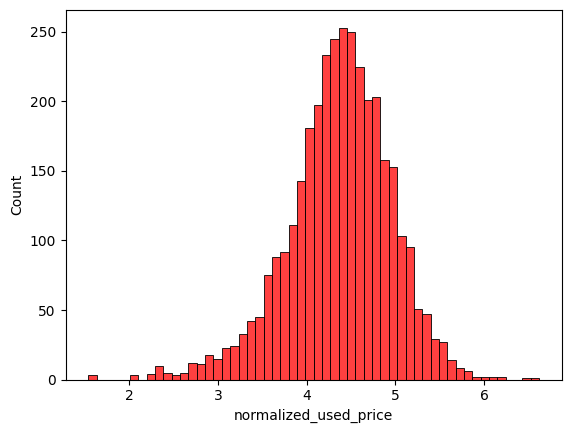

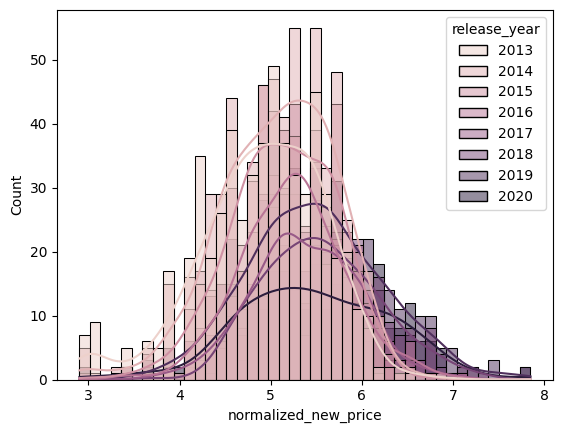

In [20]:
sns.histplot(data=df1, x='normalized_new_price',color='red', hue='release_year', kde=True);

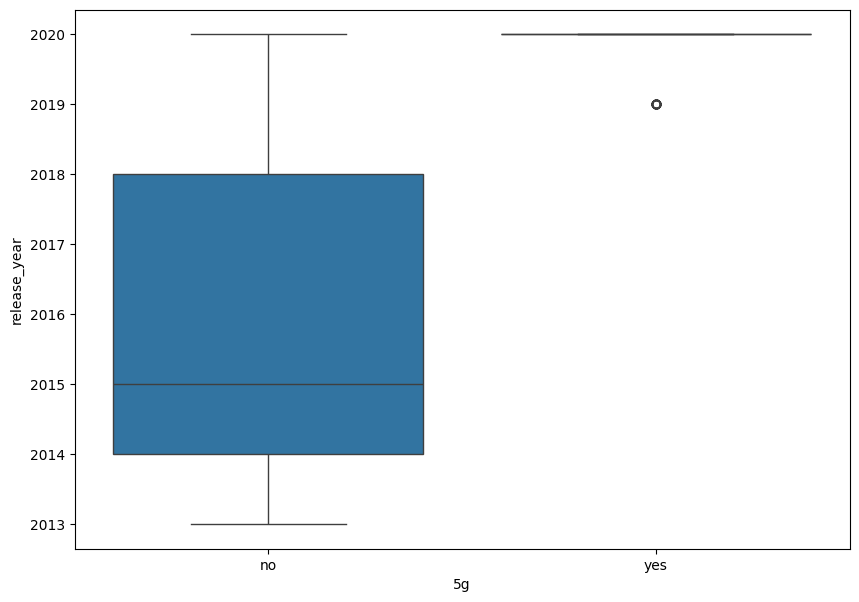

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df1,x='5g',y='release_year');

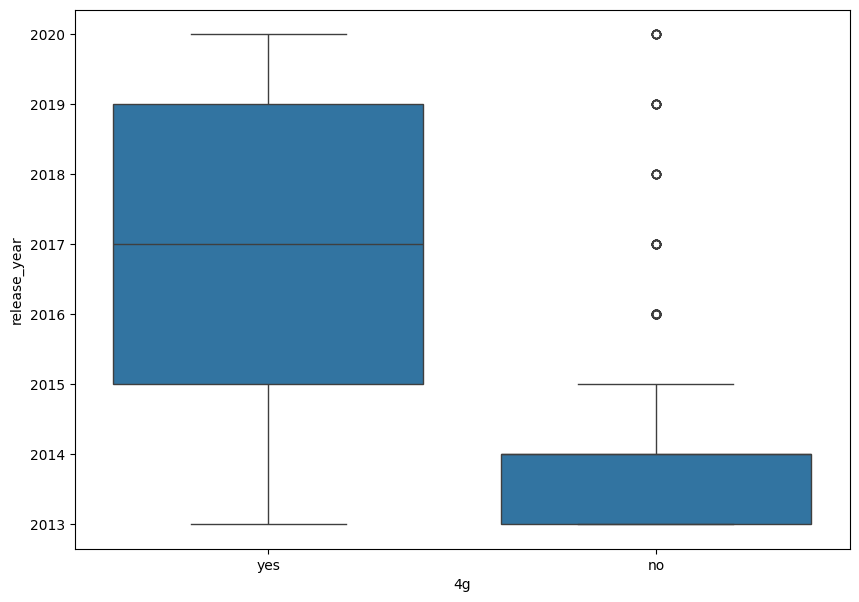

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df1,x='4g',y='release_year');

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [70]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot_colored(data, feature, figsize=(12, 7), bins=None, boxplot_color="skyblue", hist_color="purple"):
    """
    This function takes a dataframe and a feature name, then creates a histogram and a boxplot
    for the feature with specified colors for each plot. It uses seaborn and matplotlib to create the plots.

    Args:
    - data (DataFrame): The dataframe containing the data.
    - feature (str): The name of the feature (column) to plot.
    - figsize (tuple): Figure size passed to matplotlib.
    - bins (int): Number of bins for the histogram. If None, default bin count is used.
    - boxplot_color (str): Color for the boxplot.
    - hist_color (str): Color for the histogram.
    """
    # Setting up the matplotlib figure (creates a new figure)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)

    # Creating a boxplot with a specified color
    sns.boxplot(data=df1, x=feature, ax=ax_box, color=boxplot_color)
    ax_box.set(xlabel='')

    # Creating a histogram with a specified color
    sns.histplot(data=df1, x=feature, ax=ax_hist, bins=bins if bins else 'auto', color=hist_color)

 # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=df1, x=feature, kde=True, ax=ax_hist, bins=bins
    ) if bins else sns.histplot(
        data=df1, x=feature, kde=True, ax=ax_hist
    )  # For histogram
    ax_hist.axvline(
        data[feature].mean(), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

    # Removing the x-axis name for the boxplot
    ax_box.set(xlabel='')
    ax_hist.set(xlabel=feature)

    # Title for the plots
    plt.suptitle(f'Histogram and Boxplot for {feature}')

    plt.show()




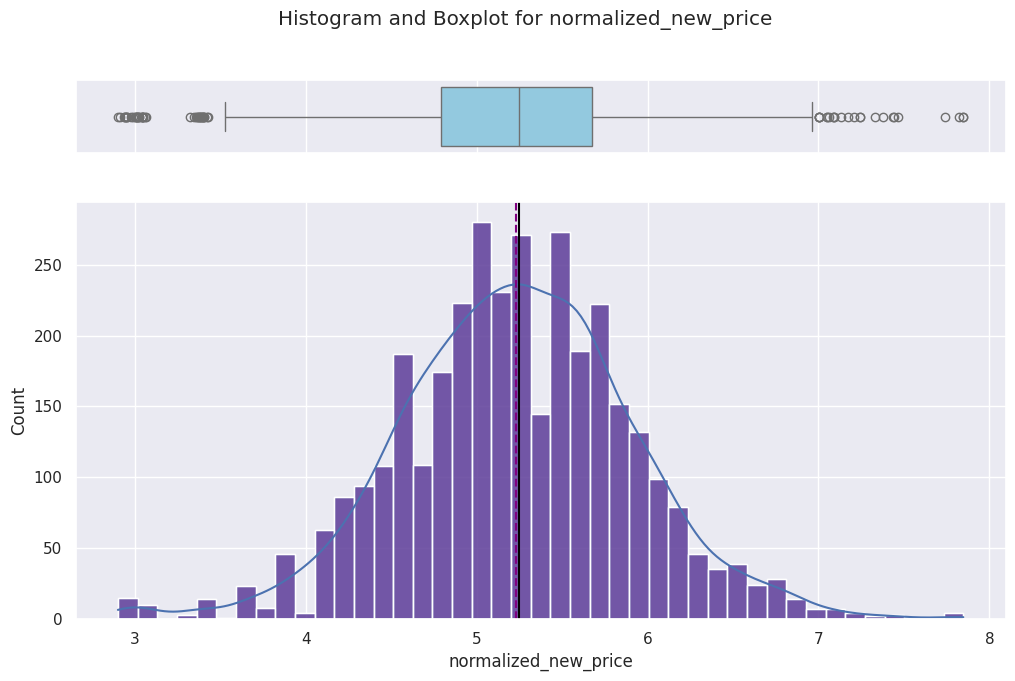

In [69]:
# Let's use the updated function to plot 'normalized_new_price' with custom colors
histogram_boxplot_colored(df1, 'normalized_new_price', boxplot_color="skyblue", hist_color="purple")

In [60]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#What does the distribution of normalized used device prices look like?

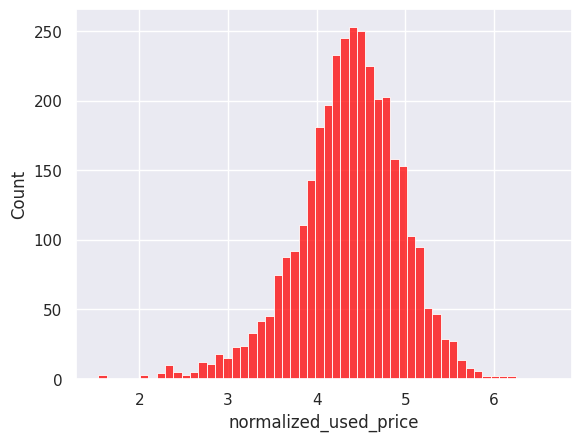

In [43]:
#What does the distribution of normalized used device prices look like?
sns.histplot(data=df1, x='normalized_used_price',color='red');


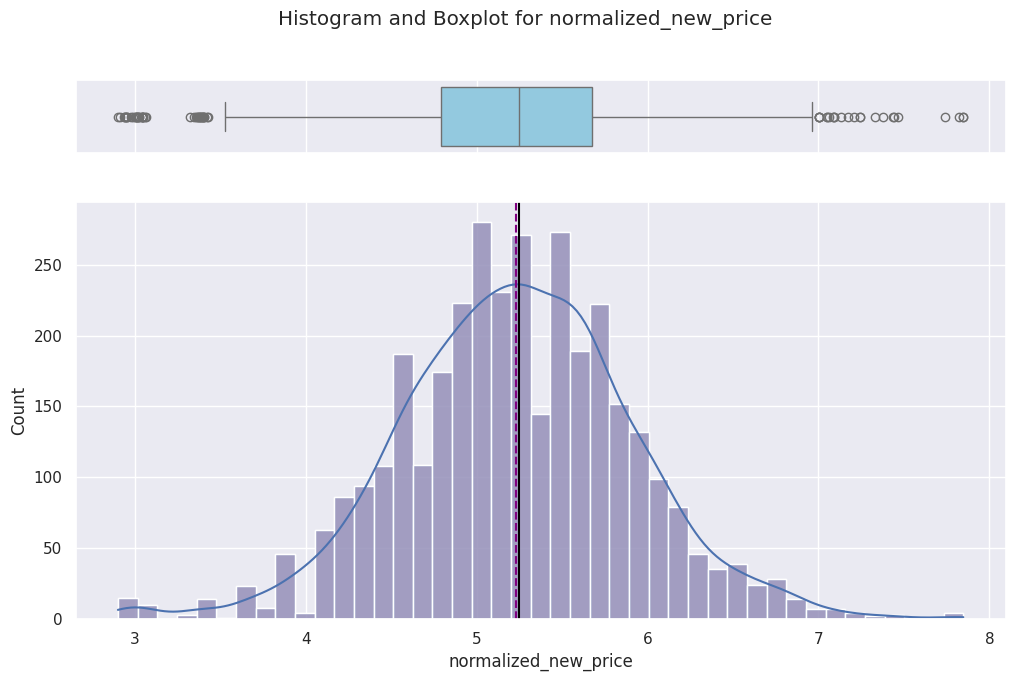

In [75]:
#Complete the code to create histogram_boxplot for 'normalized_new_price'
histogram_boxplot_colored(df1, 'normalized_new_price',boxplot_color="skyblue", hist_color="pink")

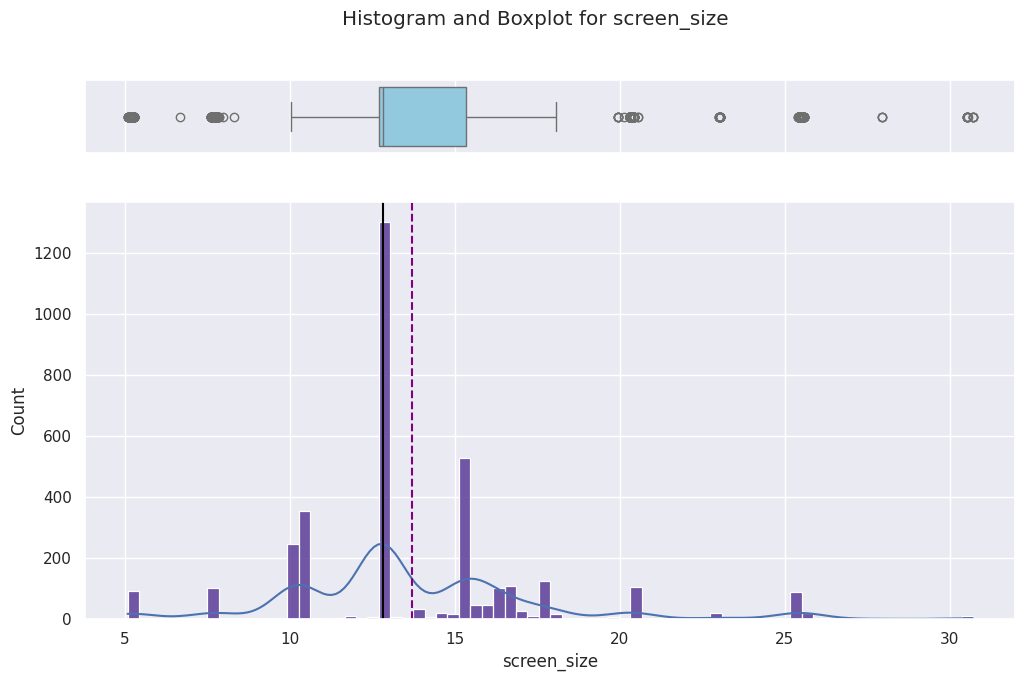

In [76]:
#Complete the code to create histogram_boxplot for 'screen_size'
histogram_boxplot_colored(df1, 'screen_size', boxplot_color="skyblue", hist_color="purple")

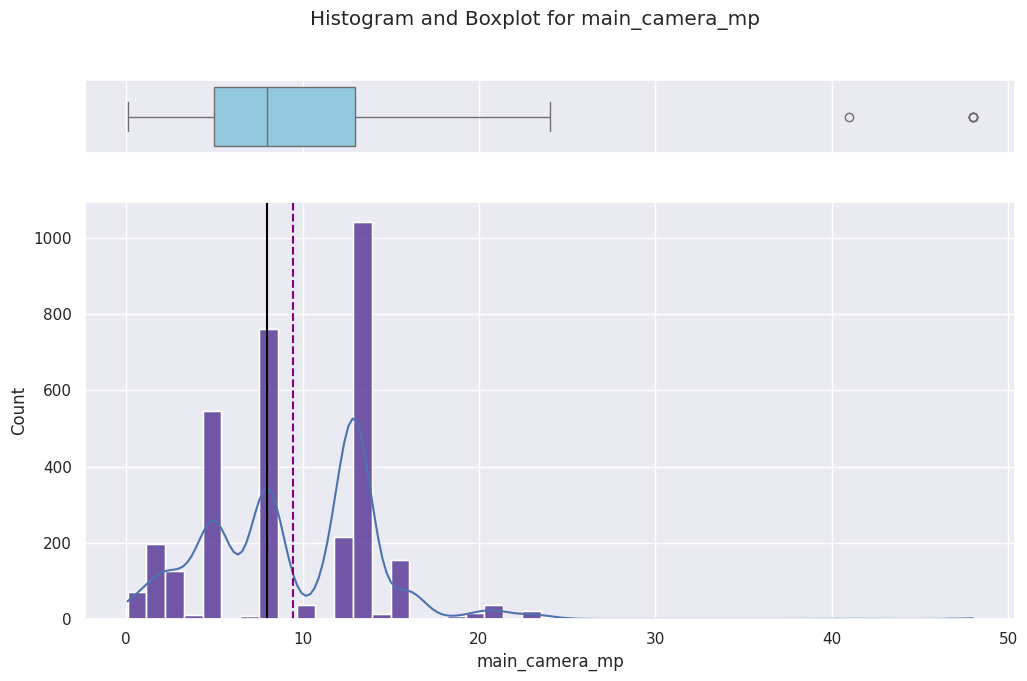

In [77]:

#Complete the code to create histogram_boxplot for 'main_camera_mp'
histogram_boxplot_colored(df1, 'main_camera_mp', boxplot_color="skyblue", hist_color="purple")

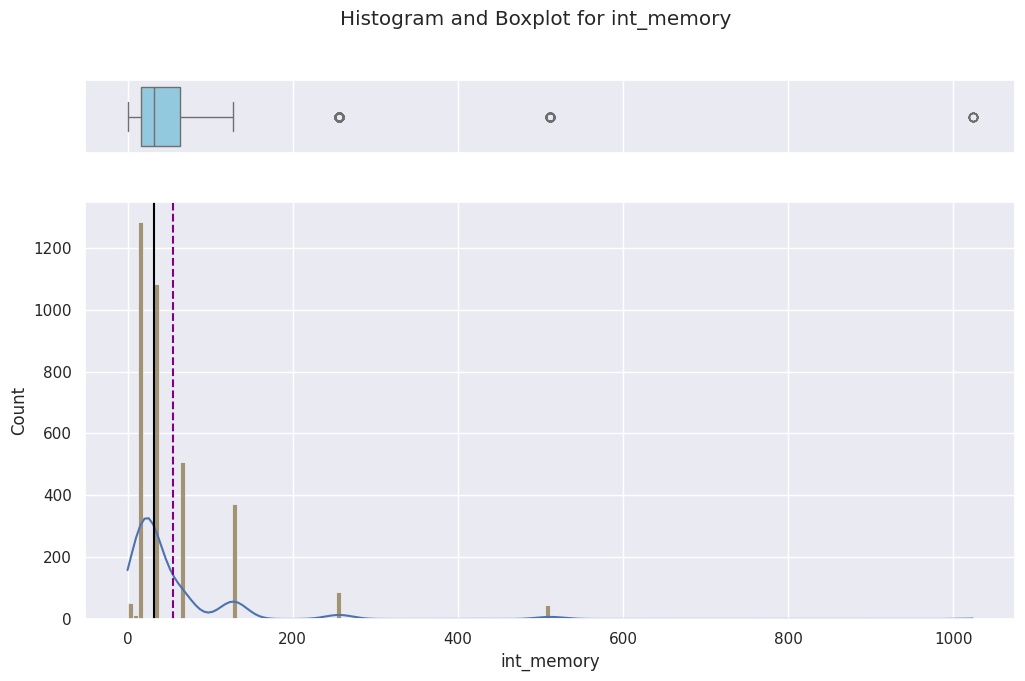

In [78]:
#Complete the code to create histogram_boxplot for 'int_memory'
histogram_boxplot_colored(df1, 'int_memory', boxplot_color="skyblue", hist_color="orange")

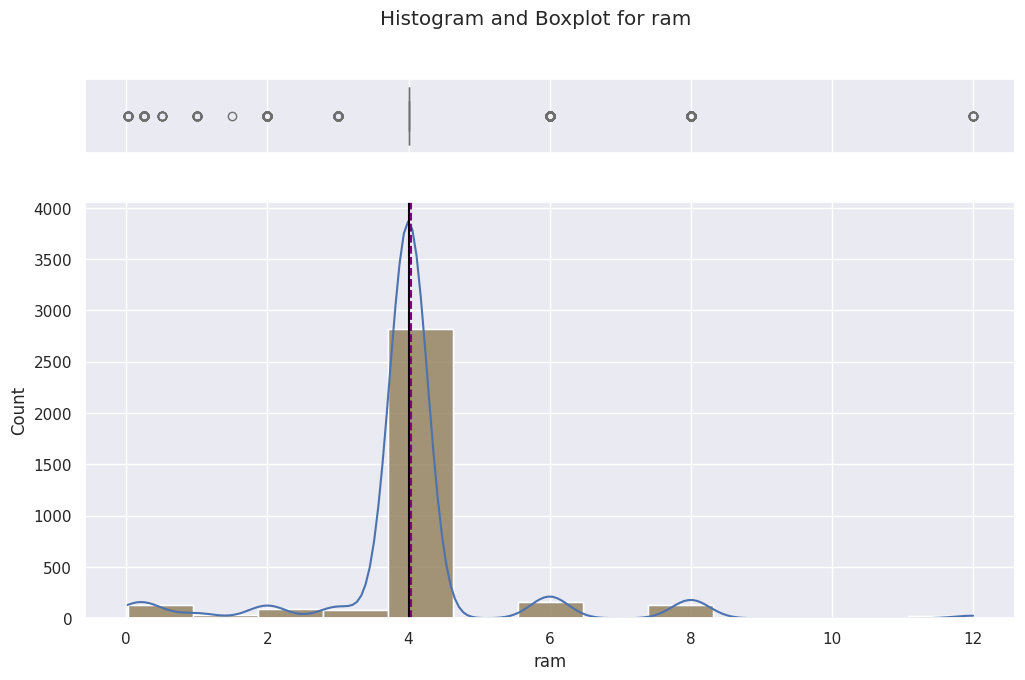

In [79]:
#Complete the code to create histogram_boxplot for 'ram'
histogram_boxplot_colored(df1, 'ram', boxplot_color="skyblue", hist_color="orange")

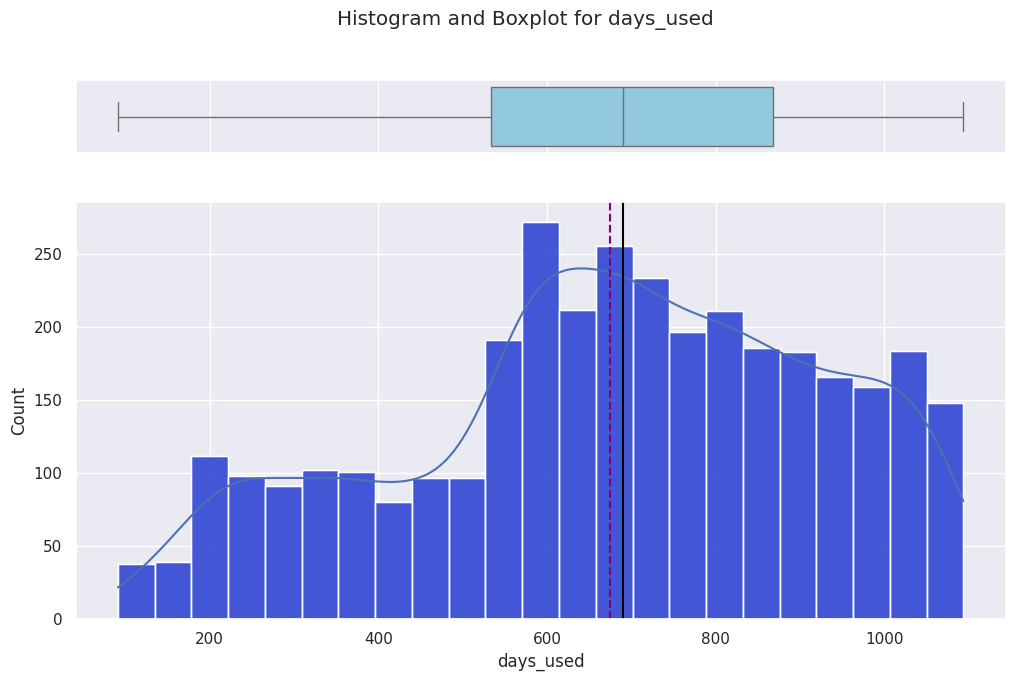

In [80]:
#Complete the code to create histogram_boxplot for 'days_used'
histogram_boxplot_colored(df1, 'days_used', boxplot_color="skyblue", hist_color="blue")

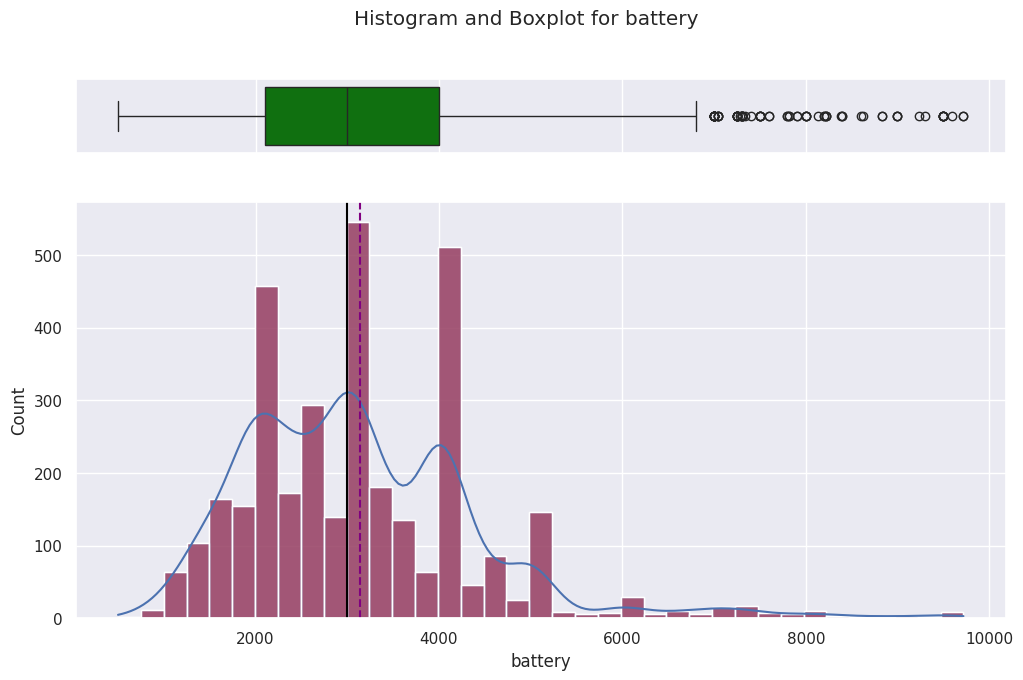

In [82]:
#Complete the code to create histogram_boxplot for'battery'
histogram_boxplot_colored(df1, 'battery', boxplot_color="green", hist_color="red")

<ipython-input-60-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


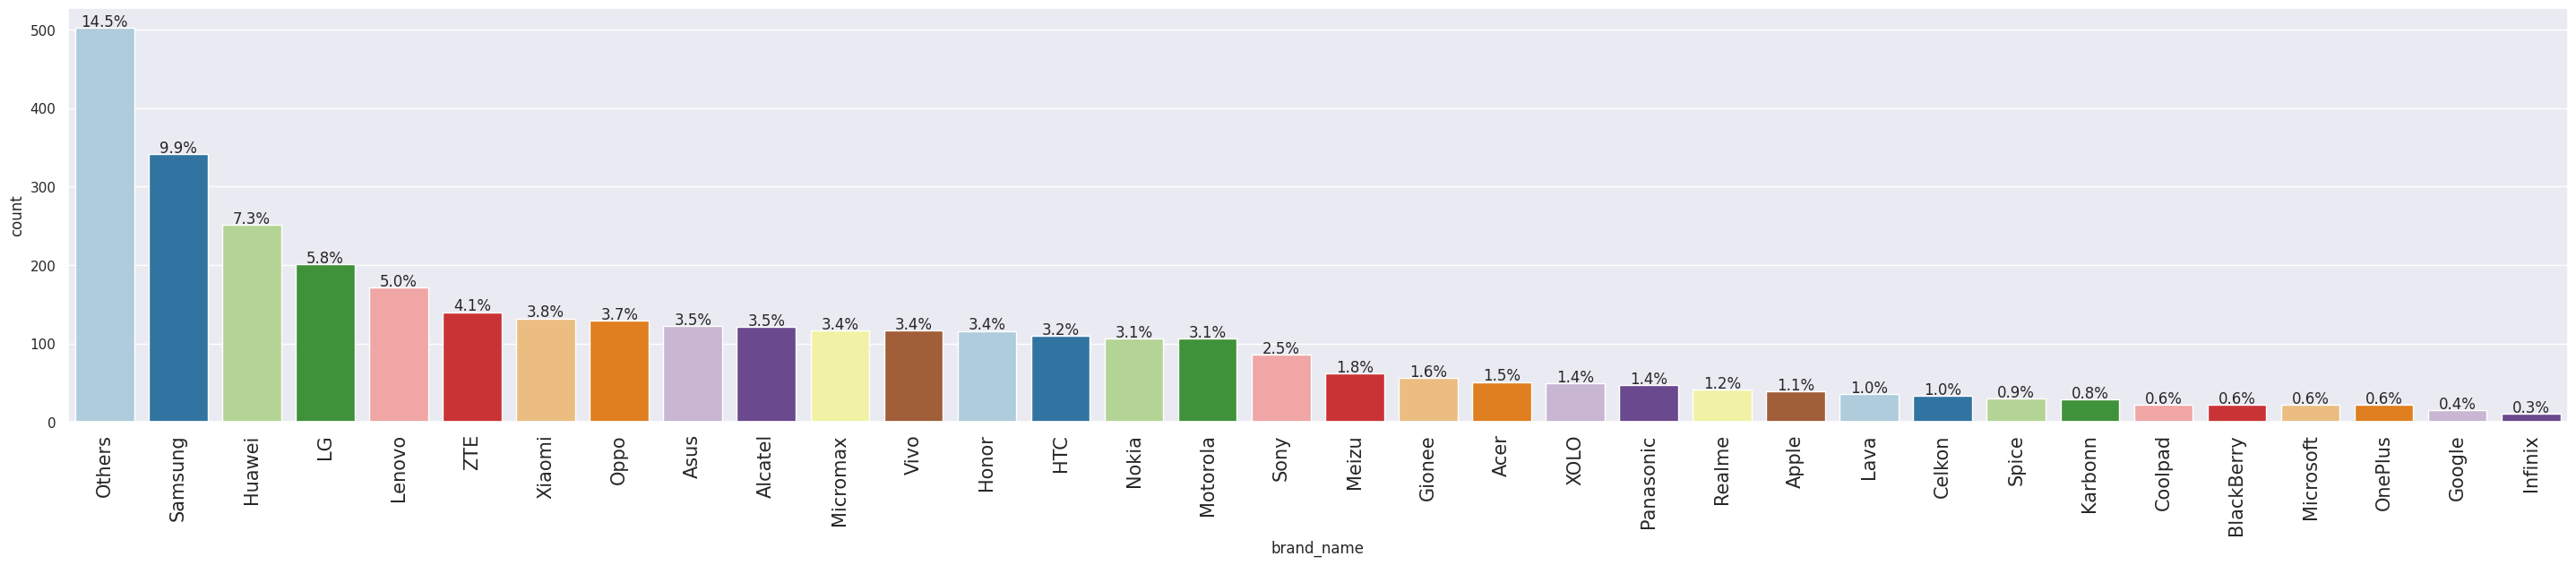

In [85]:
#summary of brand names
labeled_barplot(df1, "brand_name", perc=True);

#What percentage of the used device market is dominated by Android devices?

<ipython-input-60-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


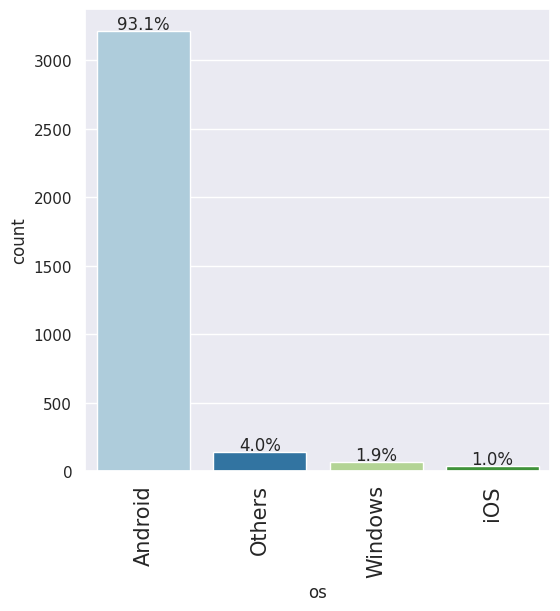

In [86]:
#summary of OS
labeled_barplot(df1, "os", perc=True);

<ipython-input-60-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


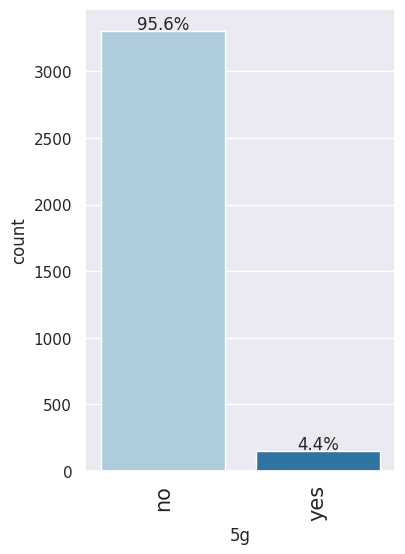

In [87]:
#summary of 5g
labeled_barplot(df1, "5g", perc=True);

<ipython-input-60-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


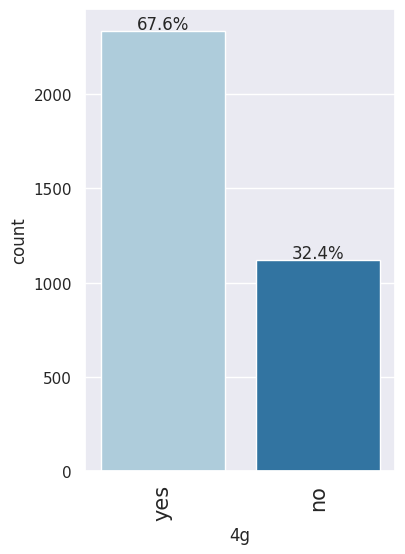

In [91]:
#summary of 4g
labeled_barplot(df1, "4g", perc=True);

<ipython-input-60-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


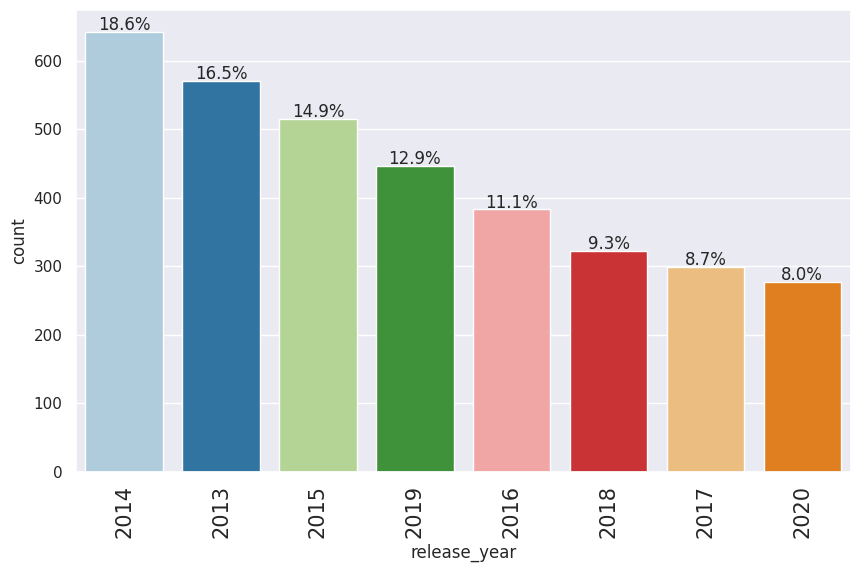

In [92]:
#summary of 'release_year'
labeled_barplot(df1, "release_year", perc=True);

Bivariate Analysis


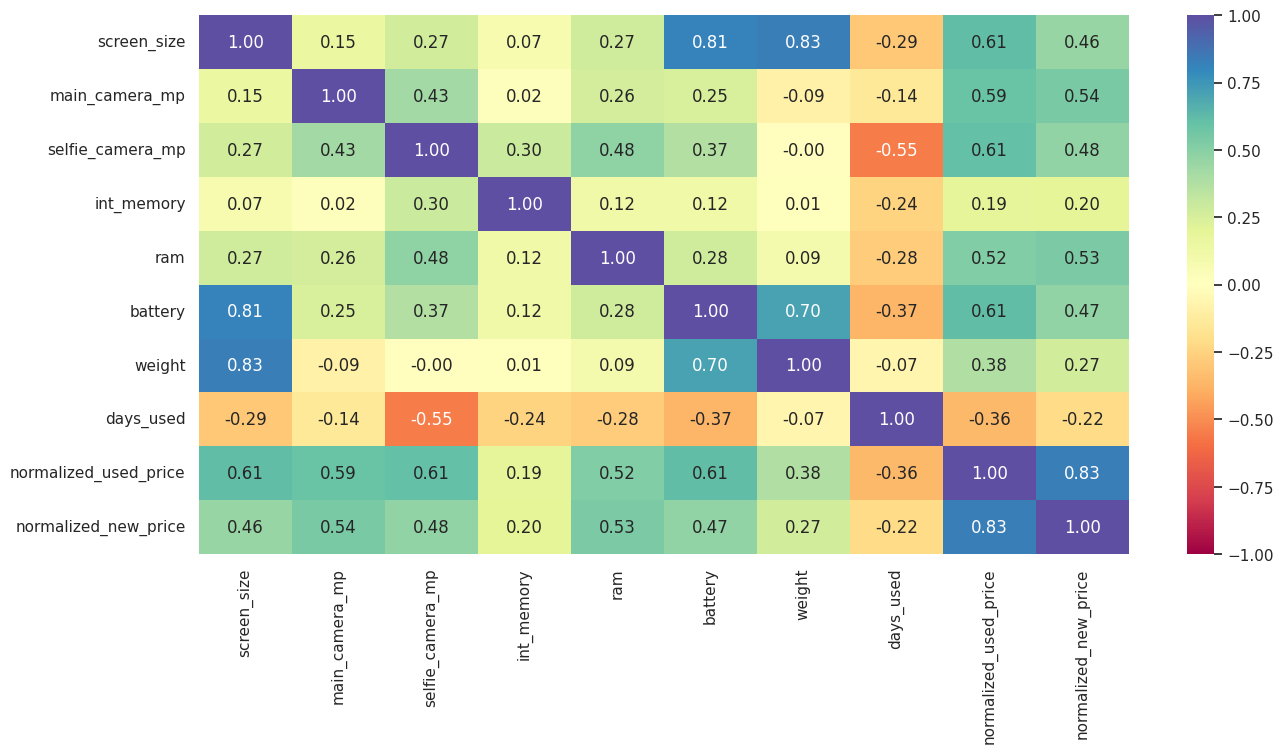

In [93]:
#checking the correlation using a heatmap
cols_list = df1.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

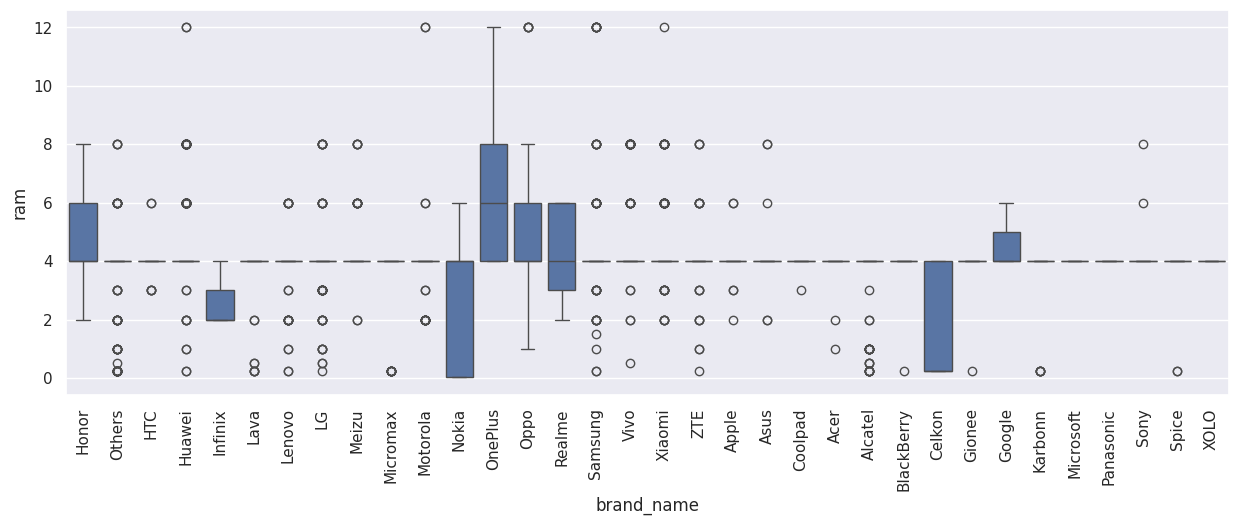

In [94]:
#Comparison of RAM size across the different brands
plt.figure(figsize=(15, 5))
sns.boxplot(data=df1, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

#A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [95]:
#checking for devices with large batteries
df1_large_battery = df1[df1.battery > 4500]
df1_large_battery.shape

(341, 15)

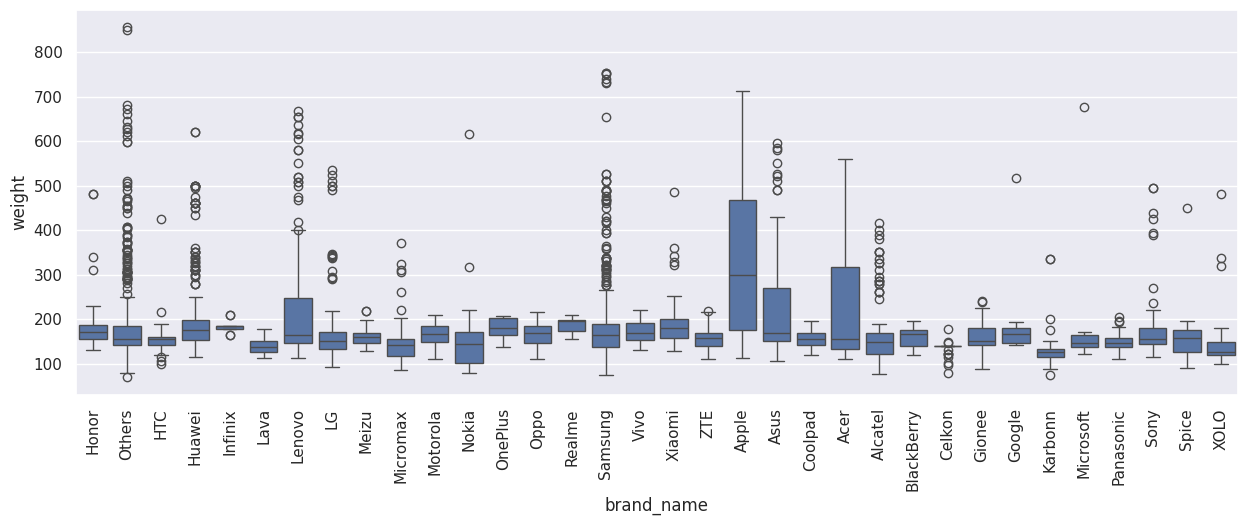

In [96]:
#plot the battery graph above
plt.figure(figsize=(15, 5))
sns.boxplot(df1, x='brand_name', y='weight') ## Complete the code to create a boxplot for 'brand_name' and 'weight'
plt.xticks(rotation=90)
plt.show()

#Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [104]:
#analyze large screens and create a plot of the same
df1_large_screen = df1[df1.screen_size > 6 * 2.54]
df1_large_screen

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829


In [128]:
# Analyze the resulting DataFrame by counting the number of devices per brand
devices_count_per_brand = df1_large_screen['brand_name'].value_counts()
devices_count_per_brand

Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Xiaomi        69
Lenovo        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
ZTE           17
Meizu         17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
HTC            7
Micromax       7
Google         4
Coolpad        3
Gionee         3
XOLO           3
Karbonn        2
Panasonic      2
Spice          2
Microsoft      1
Name: brand_name, dtype: int64

<ipython-input-130-578be7978255>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=devices_count_per_brand.values, y=devices_count_per_brand.index, palette="viridis")


Text(0, 0.5, 'Brand Name')

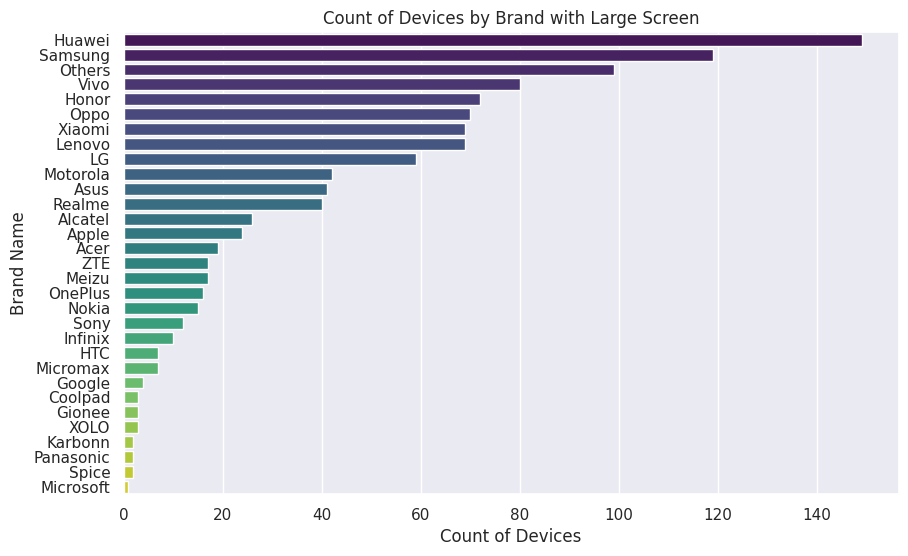

In [130]:
plt.figure(figsize=(10, 6))
sns.barplot(x=devices_count_per_brand.values, y=devices_count_per_brand.index, palette="viridis")
plt.title('Count of Devices by Brand with Large Screen')
plt.xlabel('Count of Devices')
plt.ylabel('Brand Name')

#A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

<ipython-input-126-c2e4b44ec491>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=devices_count_per_brand.values, y=devices_count_per_brand.index, palette="viridis")


Text(0, 0.5, 'Brand Name')

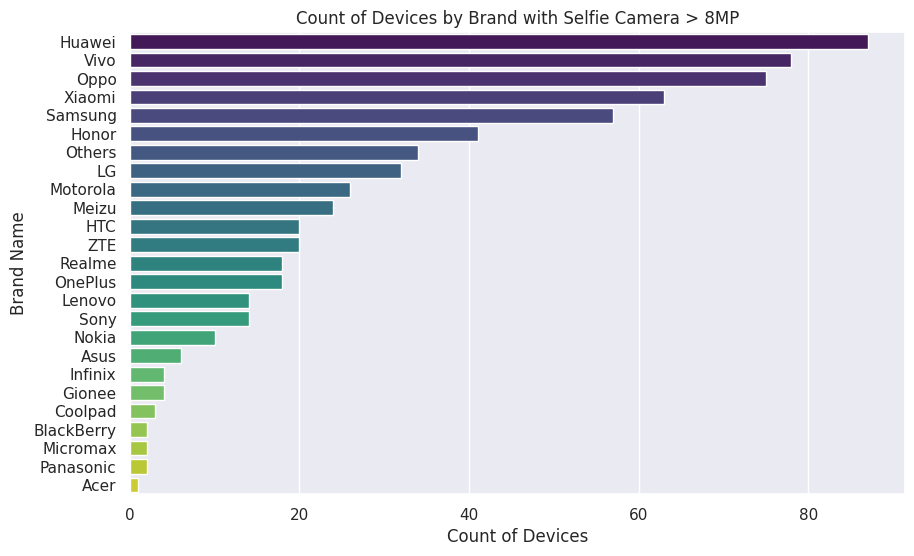

In [126]:
#Complete the code to create labeled_barplot for 'brand_name' in high selfie camera dataframe
good_selfie_cameras_df = df1[df1['selfie_camera_mp'] > 8]
# Analyze the resulting DataFrame by counting the number of devices per brand
devices_count_per_brand = good_selfie_cameras_df['brand_name'].value_counts()

# Plotting the count of devices by brand with a labeled bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=devices_count_per_brand.values, y=devices_count_per_brand.index, palette="viridis")
plt.title('Count of Devices by Brand with Selfie Camera > 8MP')
plt.xlabel('Count of Devices')
plt.ylabel('Brand Name')



#Which attributes are highly correlated with the normalized price of a used device?

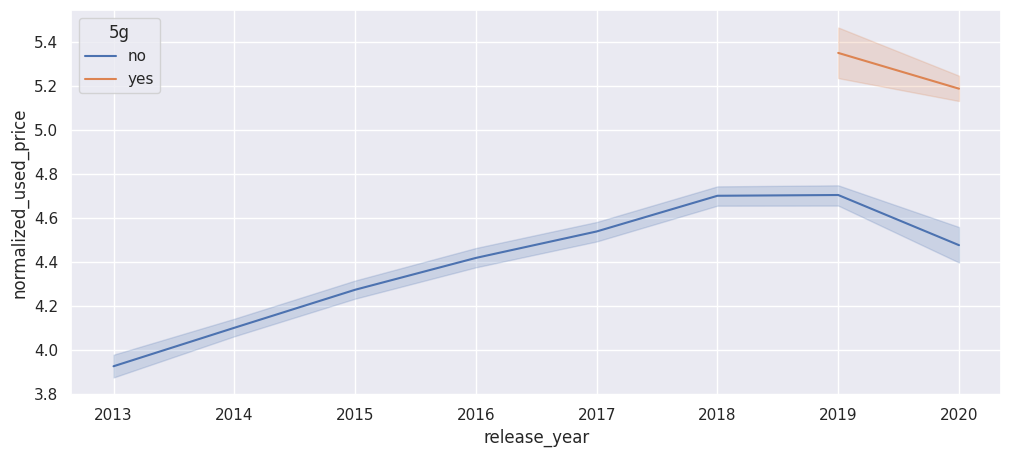

In [136]:
# Complete the code to create a lineplot for release year and used price
plt.figure(figsize=(12, 5))
sns.lineplot(df1,x='release_year', y='normalized_used_price',hue='5g')
plt.show()

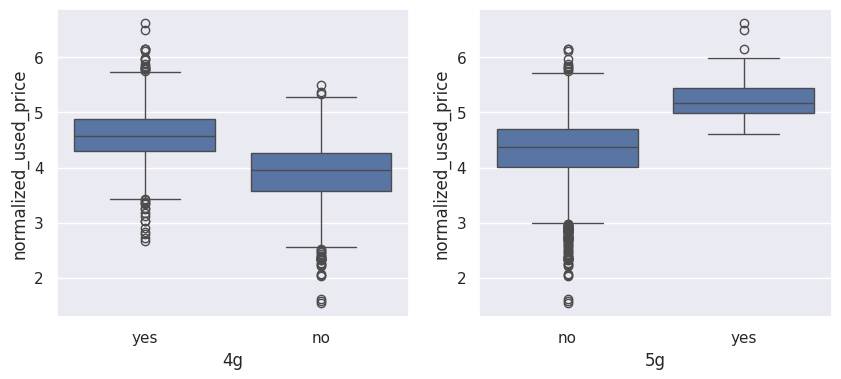

In [137]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df1, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df1, x="5g", y="normalized_used_price")

plt.show()

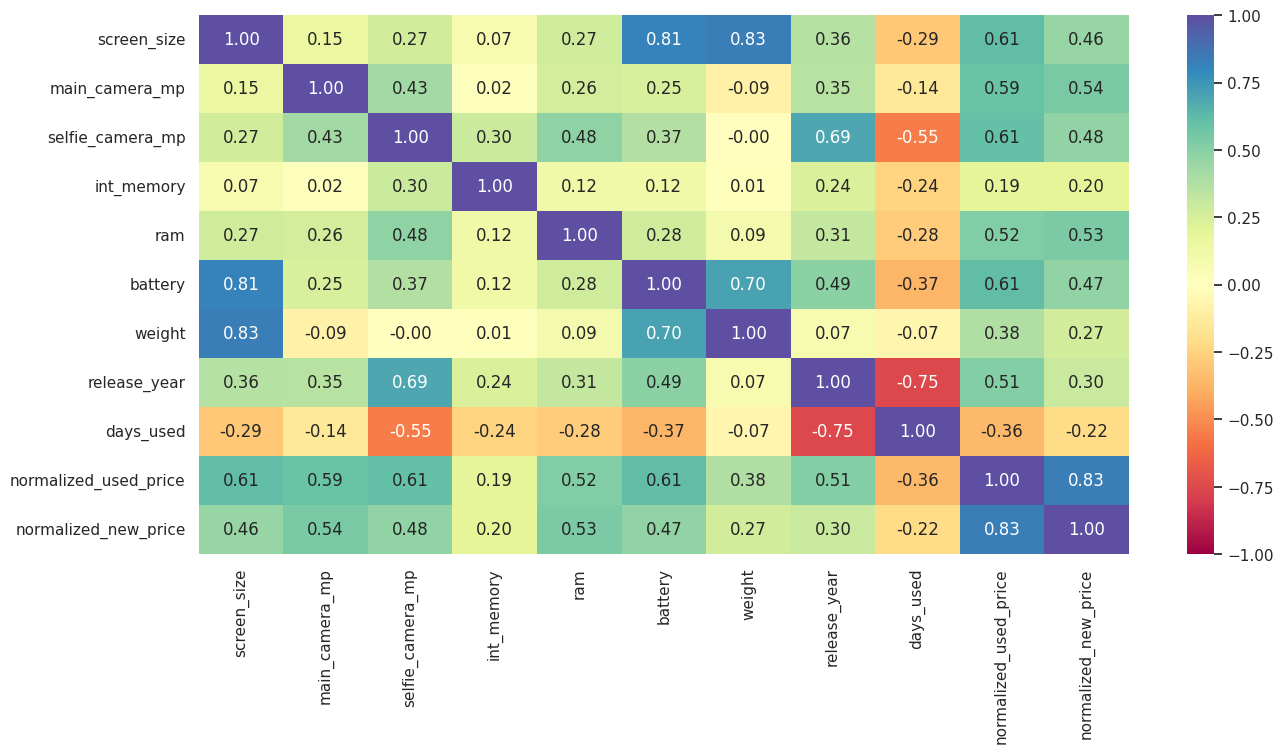

In [162]:
#checking the correlation using a heatmap
cols_list = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [138]:
#measuring value treatment
#create a copy of the data
df2=df1.copy

In [143]:
df2 = df2()  # Assuming df2() is a function that returns a DataFrame
print(df2.isnull().sum())


brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64


In [144]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]


for col in cols_impute:
    df2[col] = df2[col].fillna(
        value=df2.groupby(['release_year', 'brand_name'])[col].transform("median")
    )   # Impute missing values in cols_impute with median by grouping the data on release year and brand name

# checking for missing values after imputation
missing_values_after_imputation = df2.isnull().sum()  # Use .isnull().sum() to check for missing values across the DataFrame
print(missing_values_after_imputation)


brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64


In [145]:
#lmpute the remaining missing values in the data by the column medians grouped by brand_name.
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df2[col] = df2[col].fillna(
        value=df2.groupby(['brand_name'])[col].transform("median")
    ) ## Complete the code to impute the missing values in cols_impute with median by grouping the data on brand name

# checking for missing values
missing_values_after_imputation2 = df2.isnull().sum()  # Use .isnull().sum() to check for missing values across the DataFrame
print(missing_values_after_imputation2)

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64


In [148]:
df2["main_camera_mp"] = df2["main_camera_mp"].fillna(df2["main_camera_mp"].median()) ## Complete the code to impute the data with median

# checking for missing values
missing_values_after_imputation3 = df2.isnull().sum()  # Use .isnull().sum() to check for missing values across the DataFrame
print(missing_values_after_imputation3)

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64


## EDA

- It is a good idea to explore the data once again after manipulating it.

Let's create a new column years_since_release from the release_year column.

We will consider the year of data collection, 2021, as the baseline.

We will drop the release_year column.

In [156]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  days_used              3454 non-null   int64  
 12  normalized_used_price  3454 non-null   float64
 13  normalized_new_price   3454 non-null   float64
 14  years_since_release    3454 non-null   int64  
dtypes: f

In [157]:
df2["release_year_recalculated"] = 2021 - df2["years_since_release"]


In [158]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 3454 non-null   object 
 1   os                         3454 non-null   object 
 2   screen_size                3454 non-null   float64
 3   4g                         3454 non-null   object 
 4   5g                         3454 non-null   object 
 5   main_camera_mp             3454 non-null   float64
 6   selfie_camera_mp           3454 non-null   float64
 7   int_memory                 3454 non-null   float64
 8   ram                        3454 non-null   float64
 9   battery                    3454 non-null   float64
 10  weight                     3454 non-null   float64
 11  days_used                  3454 non-null   int64  
 12  normalized_used_price      3454 non-null   float64
 13  normalized_new_price       3454 non-null   float

In [160]:
df2["years_since_release"] = 2021 - df2["release_year_recalculated"]
df2.drop("release_year_recalculated", axis=1, inplace=True)
df2["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

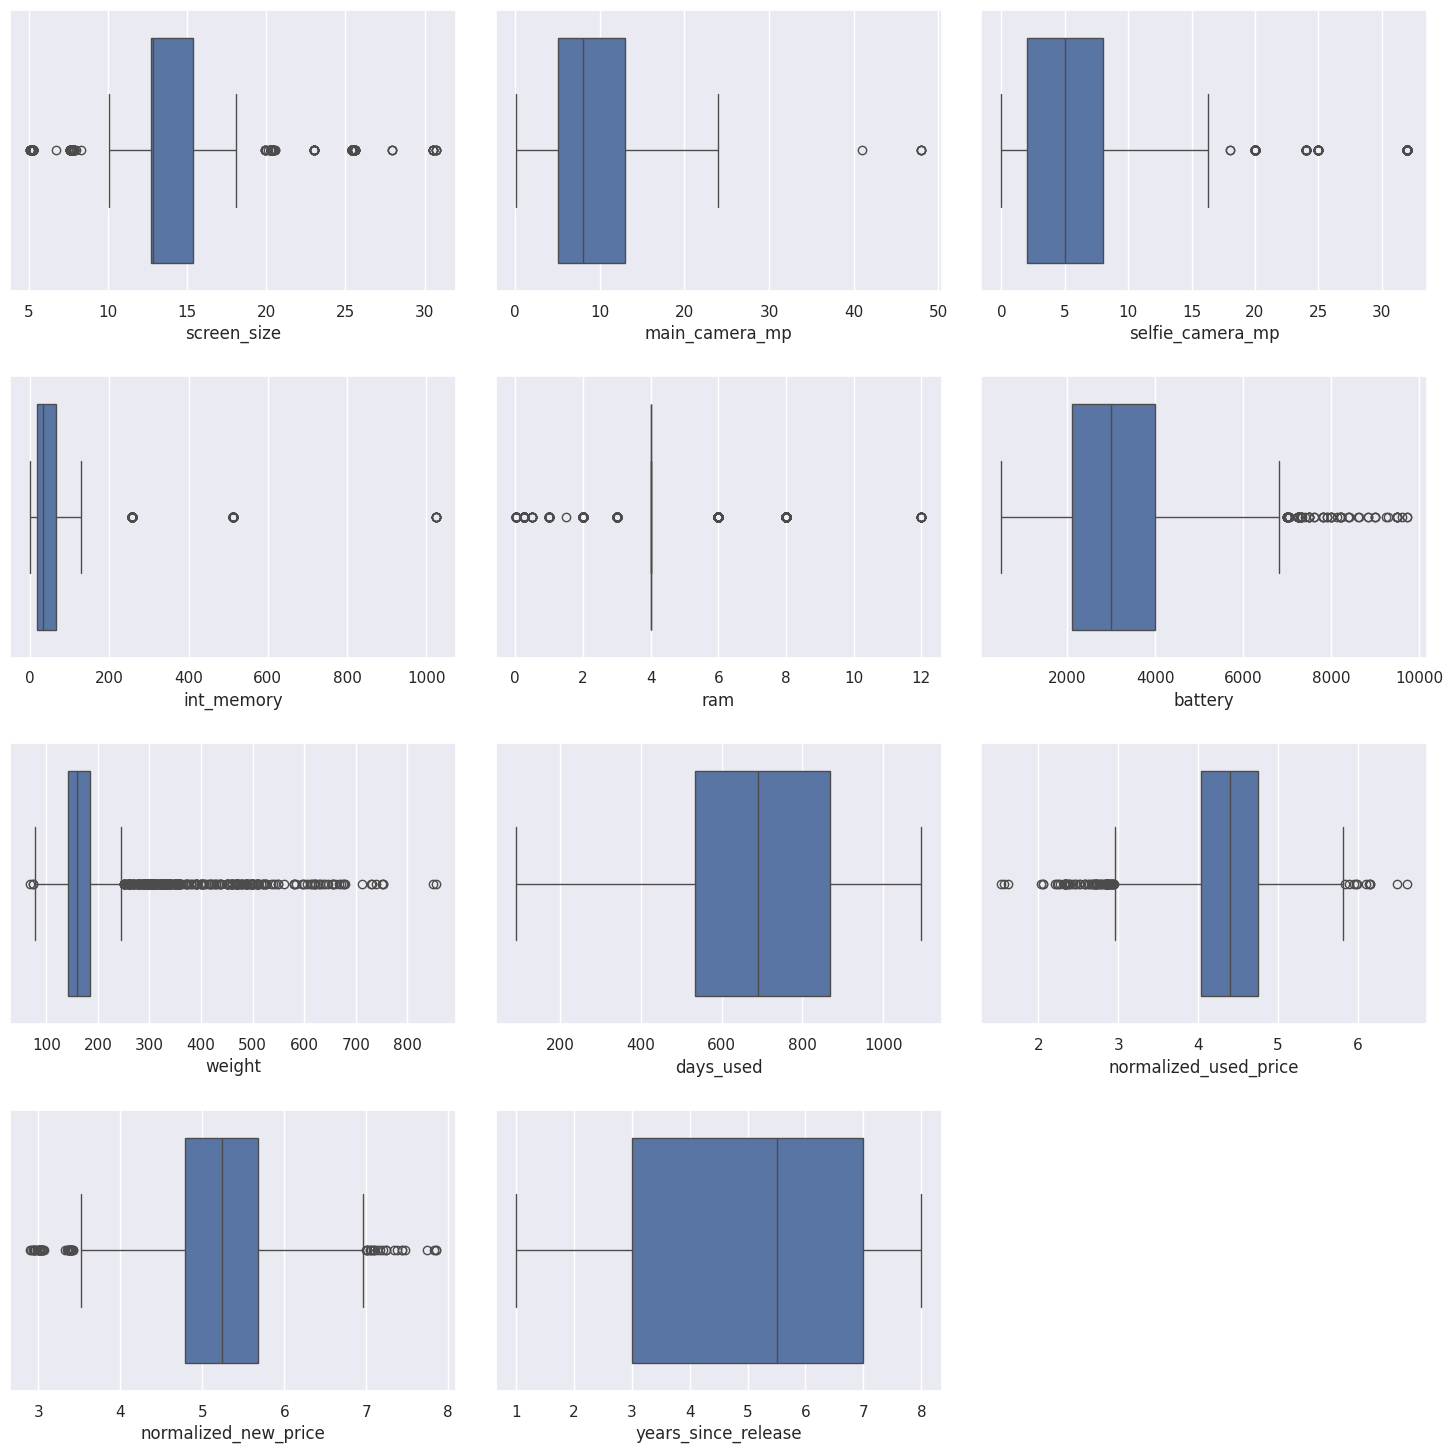

In [161]:
#checking for outliers using a box plot
num_cols = df2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df2, x=variable)
    plt.tight_layout(pad=2)

plt.show()

#Preparation for Modelling
We want to predict the normalized price of used devices

Before we proceed to build a model, we'll have to encode categorical features

We'll split the data into train and test to be able to evaluate the model that we build on the train data

We will build a Linear Regression model using the train data and then check it's performance

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# First, let's encode categorical features
categorical_cols = [col for col in df2.columns if df2[col].dtype == 'object' and col != 'normalized_new_price']
numerical_cols = [col for col in df2.columns if df2[col].dtype != 'object' and col != 'normalized_new_price']

# Use OneHotEncoder for categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical = encoder.fit_transform(df2[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

# Combine encoded categorical data with numerical data
X = pd.concat([encoded_categorical_df, df2[numerical_cols].reset_index(drop=True)], axis=1)
y = df2['normalized_new_price']

# Display the first few rows of X and y
print(X.head())
print()
print(y.head())

   brand_name_Alcatel  brand_name_Apple  brand_name_Asus  \
0                 0.0               0.0              0.0   
1                 0.0               0.0              0.0   
2                 0.0               0.0              0.0   
3                 0.0               0.0              0.0   
4                 0.0               0.0              0.0   

   brand_name_BlackBerry  brand_name_Celkon  brand_name_Coolpad  \
0                    0.0                0.0                 0.0   
1                    0.0                0.0                 0.0   
2                    0.0                0.0                 0.0   
3                    0.0                0.0                 0.0   
4                    0.0                0.0                 0.0   

   brand_name_Gionee  brand_name_Google  brand_name_HTC  brand_name_Honor  \
0                0.0                0.0             0.0               1.0   
1                0.0                0.0             0.0               1.0   
2    

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [164]:
#adding intercept to X
# let's add the intercept to data
X = sm.add_constant(X)

In [165]:

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)  ## This creates dummies for independent features


In [167]:
# X and y are already defined as your independent and dependent variables respectively
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70:30 split
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [170]:
# Add a constant to X for the intercept
X_with_const = sm.add_constant(x_train)
# Fit the OLS model
olsmodel1 = sm.OLS(y_train, X_with_const).fit()
print(olsmodel1.summary())

                             OLS Regression Results                             
Dep. Variable:     normalized_new_price   R-squared:                       0.789
Model:                              OLS   Adj. R-squared:                  0.785
Method:                   Least Squares   F-statistic:                     184.7
Date:                  Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                          22:30:06   Log-Likelihood:                -655.82
No. Observations:                  2417   AIC:                             1410.
Df Residuals:                      2368   BIC:                             1693.
Df Model:                            48                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const     

In [175]:
# Add a constant to x_test to match the model's expectations
x_test_with_const = sm.add_constant(x_test)

# Make predictions on the training set
y_train_pred = olsmodel1.predict(X_with_const)  # Use the same X_with_const used for fitting

# Make predictions on the test set
y_test_pred = olsmodel1.predict(x_test_with_const)

# Print some of the predictions
print("Training set predictions:", y_train_pred[:5])  # Print first 5 predictions for the training set
print("Test set predictions:", y_test_pred[:5])      # Print first 5 predictions for the test set


Training set predictions: 1744    5.493028
3141    4.900835
1233    5.267156
3046    4.714797
2649    5.301732
dtype: float64
Test set predictions: 511     4.631655
51      5.650952
1171    5.538545
2282    5.003054
557     4.252336
dtype: float64


## Model Performance Check

In [177]:
# Calculate MSE for the training and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate RMSE for the training and test sets
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Print the results
print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
print(f"Training RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")



Training MSE: 0.10074115429769563
Test MSE: 0.09758116780254776
Training RMSE: 0.3173974705281938
Test RMSE: 0.3123798453846659


##Linear Regression Model

In [176]:
# Instantiate the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(x_train, y_train)

# Predict on the training and test sets
y_train_pred = lr_model.predict(x_train)
y_test_pred = lr_model.predict(x_test)

# Evaluate the model's performance
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training R^2: {train_r2}")
print(f"Test R^2: {test_r2}")


Training MSE: 0.10074115429769563
Test MSE: 0.09758116780254776
Training R^2: 0.789190528545263
Test R^2: 0.7793374914407711


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

No Multicollinearity

Linearity of variables

Independence of error terms

Normality of error terms

No Heteroscedasticity

In [178]:
#No.1. No multicollinearity
# `X` is your dataframe of independent variables
# Add constant for VIF calculation
X_vif = sm.add_constant(X)

# Calculate VIF for each explanatory variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

                  Feature         VIF
0                   const  244.551918
1      brand_name_Alcatel    3.298163
2        brand_name_Apple   14.594988
3         brand_name_Asus    3.320530
4   brand_name_BlackBerry    1.519639
5       brand_name_Celkon    1.774905
6      brand_name_Coolpad    1.450349
7       brand_name_Gionee    2.104011
8       brand_name_Google    1.317560
9          brand_name_HTC    3.131989
10       brand_name_Honor    3.337783
11      brand_name_Huawei    5.708745
12     brand_name_Infinix    1.237228
13     brand_name_Karbonn    1.582698
14          brand_name_LG    4.783433
15        brand_name_Lava    1.719957
16      brand_name_Lenovo    4.197375
17       brand_name_Meizu    2.265330
18    brand_name_Micromax    3.239471
19   brand_name_Microsoft    1.951238
20    brand_name_Motorola    3.135081
21       brand_name_Nokia    3.355819
22     brand_name_OnePlus    1.483472
23        brand_name_Oppo    3.611443
24      brand_name_Others    9.377415
25   brand_n

In [179]:
#Treating multicollinearity
#Dropping columns with VIF>5
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [183]:
col_list = ['brand_name_Apple', 'os_iOS', 'weight', 'screen_size', 'brand_name_Huawei', 'brand_name_Samsung', 'brand_name_Others']  # Column names with high VIF
# Drop the high VIF columns from the training data
x_train_reduced = x_train.drop(col_list, axis=1)

# Add a constant to the reduced training data for the intercept
X_with_const_reduced = sm.add_constant(x_train_reduced)

# Fit the OLS model with the reduced training data
olsmodel_reduced = sm.OLS(y_train, X_with_const_reduced).fit()

# Print the summary of the model to evaluate performance
print(olsmodel_reduced.summary())

                             OLS Regression Results                             
Dep. Variable:     normalized_new_price   R-squared:                       0.780
Model:                              OLS   Adj. R-squared:                  0.776
Method:                   Least Squares   F-statistic:                     205.1
Date:                  Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                          23:03:31   Log-Likelihood:                -708.77
No. Observations:                  2417   AIC:                             1502.
Df Residuals:                      2375   BIC:                             1745.
Df Model:                            41                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const     

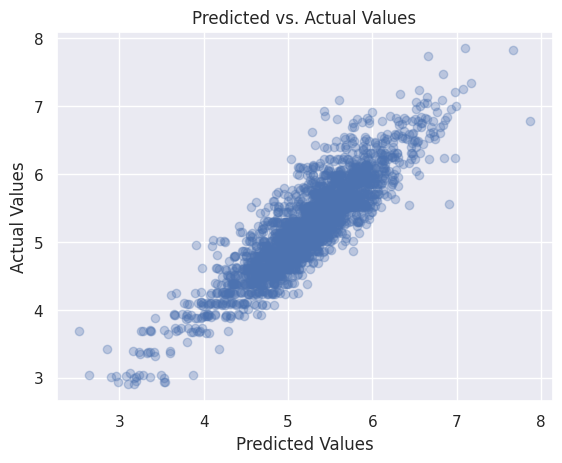

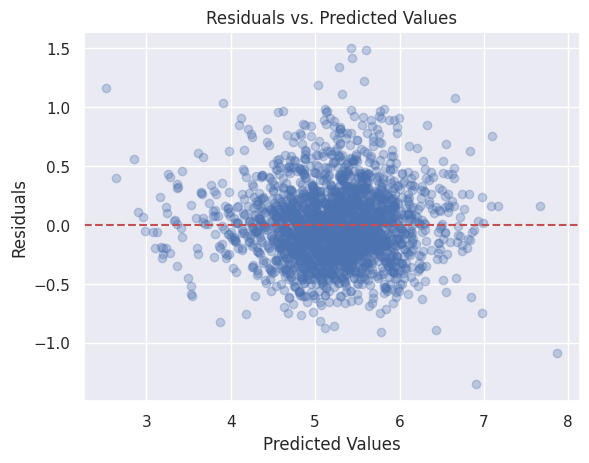

In [184]:
#No.2 Linearity of variables
# Plotting predicted values vs actual values
plt.scatter(y_train_pred, y_train, alpha=0.3)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

# Plotting residuals vs predicted values
plt.scatter(y_train_pred, y_train - y_train_pred, alpha=0.3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [185]:
#No.3 independence of error terms
from statsmodels.stats.stattools import durbin_watson

# Calculate and print Durbin-Watson statistic
dw_stat = durbin_watson(y_train - y_train_pred)
print(f"Durbin-Watson statistic: {dw_stat}")


Durbin-Watson statistic: 1.9787892703677654


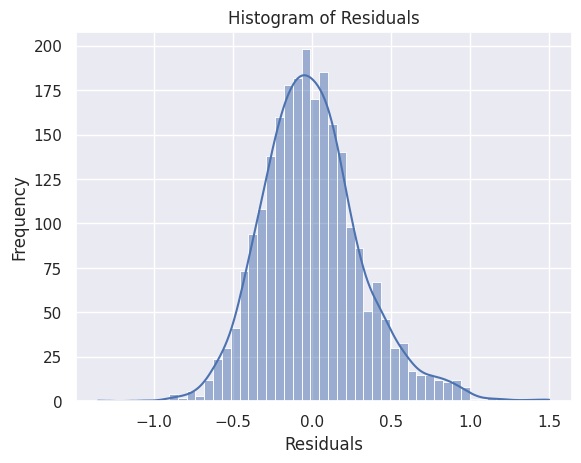

In [196]:
# Calculate residuals
residuals = y_train - y_train_pred

# Plotting the histogram of residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


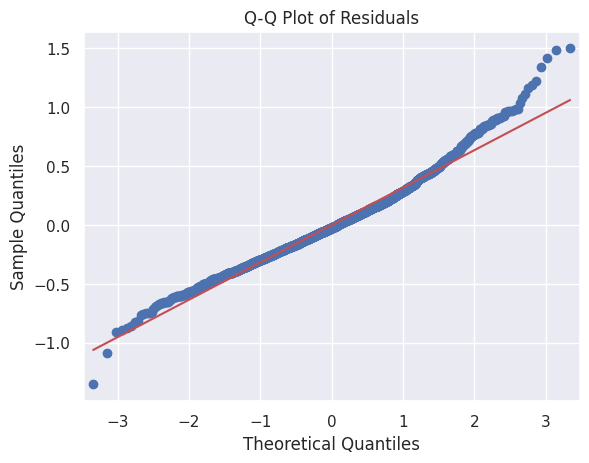

In [197]:
#QQ Plot
import statsmodels.api as sm

# Q-Q plot for residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


In [198]:
from scipy.stats import shapiro

# Shapiro-Wilk Test
stat, p_value = shapiro(residuals)
print('Shapiro-Wilk Test statistics=%.3f, p=%.3f' % (stat, p_value))

# Interpretation
if p_value > 0.05:
    print("The residuals seem to follow a normal distribution.")
else:
    print("The residuals do not seem to follow a normal distribution.")


Shapiro-Wilk Test statistics=0.980, p=0.000
The residuals do not seem to follow a normal distribution.


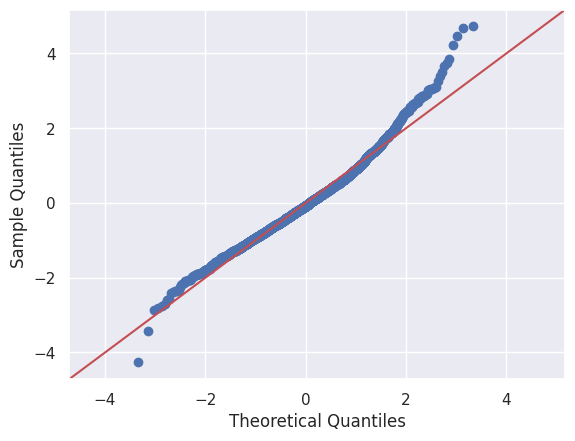

Shapiro-Wilk test p-value: 7.211277034995427e-18


In [199]:
#No. 4 Normality of error terms
from scipy.stats import shapiro

# Q-Q plot
sm.qqplot(y_train - y_train_pred, line='45', fit=True)
plt.show()

# Shapiro-Wilk test
stat, p_value = shapiro(y_train - y_train_pred)
print(f"Shapiro-Wilk test p-value: {p_value}")


{'Lagrange multiplier statistic': 170.2838414632162, 'p-value': 1.3753828218791662e-15, 'f-value': 3.739088037563423, 'f p-value': 2.7328251586838224e-16}


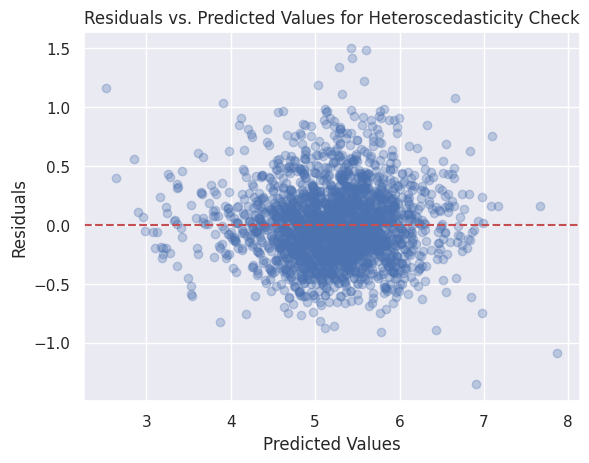

In [200]:
#No. 5 No Heteroscedasticity using the breusch pagan test
from statsmodels.stats.diagnostic import het_breuschpagan

# Test for heteroscedasticity
bp_test = het_breuschpagan(y_train - y_train_pred, X_with_const)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

# Plotting residuals vs predicted values for visual check
plt.scatter(y_train_pred, y_train - y_train_pred, alpha=0.3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values for Heteroscedasticity Check')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [202]:
#N0.5 (ii). No heteroscedasity using the Goldfeld-Quandt test
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Perform the Goldfeld-Quandt test
gq_test = het_goldfeldquandt(y_train - y_train_pred, X_with_const)

print("Goldfeld-Quandt test statistic:", gq_test[0])
print("P-value:", gq_test[1])

# Interpretation
if gq_test[1] < 0.05:
    print("Evidence of heteroscedasticity (reject H0 of homoscedasticity)")
else:
    print("No evidence of heteroscedasticity (fail to reject H0 of homoscedasticity)")



Goldfeld-Quandt test statistic: 1.0694761787787048
P-value: 0.1264653718035092
No evidence of heteroscedasticity (fail to reject H0 of homoscedasticity)


## Final Model

In [206]:
# Fit the final OLS model
olsmodel_final = sm.OLS(y_train, X_with_const).fit()

# Print the summary of the final model
print(olsmodel_final.summary())

                             OLS Regression Results                             
Dep. Variable:     normalized_new_price   R-squared:                       0.789
Model:                              OLS   Adj. R-squared:                  0.785
Method:                   Least Squares   F-statistic:                     184.7
Date:                  Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                          23:43:29   Log-Likelihood:                -655.82
No. Observations:                  2417   AIC:                             1410.
Df Residuals:                      2368   BIC:                             1693.
Df Model:                            48                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const     

In [208]:
y_train_pred = olsmodel_final.predict(X_with_const)

In [210]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def model_performance_regression(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}




In [211]:
# Assuming the function model_performance_regression requires actual values and predicted values as inputs
olsmodel_final_train_perf = model_performance_regression(y_train, y_train_pred)
print("Training Performance\n")
print(olsmodel_final_train_perf)


Training Performance

{'MAE': 0.24357175229181233, 'MSE': 0.10074115429769565, 'RMSE': 0.3173974705281938, 'R²': 0.789190528545263}


## Actionable Insights and Recommendations

The analysis and modeling conducted on the dataset provided by ReCell offer valuable insights into the used and refurbished phone/tablet market, which is projected to grow significantly in the coming years. Our linear regression model aimed to predict the price of used devices based on various attributes, demonstrating a strong ability to explain the variance in prices with an R² value of 0.7892. Key factors influencing the price include brand name, OS, screen size, camera quality, internal memory, RAM, battery capacity, and the device's age (days used).

The model's performance metrics, such as MAE, MSE, and RMSE, indicate a reliable prediction capability with relatively low error rates, suggesting that our model can be a valuable tool for developing dynamic pricing strategies for used and refurbished devices.

#Recommendations
Based on our findings, several actionable recommendations can be made to ReCell to capitalize on the growing market for used and refurbished devices:

##Dynamic Pricing Strategy:
Implement a machine learning-based dynamic pricing model that adjusts the prices of used devices in real time, considering their specifications and market demand. This strategy can enhance competitiveness and profitability.

##Focus on Quality Attributes:
Highlight devices with higher RAM, better cameras, and larger screen sizes in marketing efforts. These attributes significantly influence pricing and consumer decision-making.

##Warranty and Insurance Offers:
Given the importance of device condition in determining used device prices, offering warranties and insurance on refurbished devices can increase their value and appeal to customers.

##Sustainability Marketing:
Emphasize the environmental benefits of purchasing used and refurbished devices, such as reducing e-waste and promoting recycling. This appeals to environmentally conscious consumers and aligns with global sustainability trends.

##Targeted Inventory Acquisition:
Prioritize acquiring devices that retain value longer, such as those with 5G capability, higher internal memory, and brands known for durability. This approach can improve inventory value over time.

##Expand Consumer Base:
Leverage the model's insights to target demographics more likely to purchase refurbished devices, such as cost-conscious consumers and businesses looking for cost-effective solutions.

##Adapt to COVID-19 Impact:
Capitalize on the increased demand for affordable devices due to the COVID-19 pandemic by offering deals and promotions on essential devices for remote work and education.

##Market Analysis:
Use the model's insights for market analysis, identifying emerging trends and consumer preferences to stay ahead in the competitive landscape.

##Educational Campaigns:
Educate consumers on the benefits and reliability of refurbished devices to dispel any misconceptions and encourage adoption.

By adopting these recommendations, ReCell can position itself as a leader in the used and refurbished device market.

In [218]:
!jupyter nbconvert --to html "//SLF_Project_LearnerNotebook_FullCode (1).ipynb"


[NbConvertApp] Converting notebook //SLF_Project_LearnerNotebook_FullCode (1).ipynb to html
[NbConvertApp] Writing 3102334 bytes to //SLF_Project_LearnerNotebook_FullCode (1).html


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

___